In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/webeet/day2/high-school-directory.csv')

Mounted at /content/drive


#EDA

In [9]:
pd.set_option("display.max_columns", None)

In [10]:
df.head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,bus,subway,primary_address_line_1,city,state_code,postcode,website,total_students,campus_name,school_type,overview_paragraph,program_highlights,language_classes,advancedplacement_courses,online_ap_courses,online_language_courses,extracurricular_activities,psal_sports_boys,psal_sports_girls,psal_sports_coed,school_sports,partner_cbo,partner_hospital,partner_highered,partner_cultural,partner_nonprofit,partner_corporate,partner_financial,partner_other,addtl_info1,addtl_info2,start_time,end_time,se_services,ell_programs,school_accessibility_description,number_programs,priority01,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,"Q113, Q22",A to Beach 25th St-Wavecrest,8-21 Bay 25 Street,Far Rockaway,NY,11691,http://schools.nyc.gov/schoolportals/27/Q260,412.0,Far Rockaway Educational Campus,NaN,Frederick Douglass Academy (FDA) VI High Schoo...,"Advisory, Graphic Arts Design, Teaching Intern...",Spanish,"Calculus AB, English Language and Composition,...","Biology, Physics B","French, Spanish","After-school Program, Book, Writing, Homework ...","Basketball, Cross Country, Indoor Track, Outdo...","Basketball, Cross Country, Indoor Track, Outdo...",NaN,"Step Team, Modern Dance, Hip Hop Dance",NaN,"Jamaica Hospital Medical Center, Peninsula Hos...","York College, Brooklyn College, St. John's Col...",NaN,"Queens District Attorney, Sports and Arts Foun...","Replications, Inc.",Citibank,New York Road Runners Foundation (NYRRF),"Uniform Required: plain white collared shirt, ...","Extended Day Program, Student Summer Orientati...",7:45 AM,2:05 PM,This school will provide students with disabil...,ESL,Not Functionally Accessible,1,Priority to Queens students or residents who a...,Then to New York City residents who attend an ...,Then to Queens students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"{'latitude': '40.601989336', 'longitude': '-73...",14.0,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,"B1, B3, B4, B6, B64, B82",D to 25th Ave ; N to Ave U ; N to Gravesend - ...,2630 Benson Avenue,Brooklyn,NY,11214,http://schools.nyc.gov/schoolportals/21/K559,260.0,Lafayette Educational Campus,NaN,At Life Academy High School for Film and Music...,"College Now, iLEARN courses, Art and Film Prod...",Spanish,NaN,"Biology, English Literature and Composition, E...",NaN,"Film, Music, Talent Show, Holiday Concert, Stu...","Basketball, Bowling, Indoor Track, Soccer, Sof...","Basketball, Bowling, Indoor Track, Soccer, Sof...",Cricket,NaN,Coney Island Generation Gap,NaN,"City Tech, Kingsborough Early College Secondar...","Museum of the Moving Image, New York Public Li...",Institute for Student Achievement,"Film Life, Inc., SONY Wonder Tech",NaN,NaN,Our school requires completion of a Common Cor...,NaN,8:15 AM,3:00 PM,This school will provide students with disabil...,ESL,Functionally Accessible,1,Priority to New York City residents who attend...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'latitude': '40.593593811', 'longitude': '-73...",13.0,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,"B15, B38, B46, B47, B52, B54, Q24","J to Kosciusko St ; M, Z to Myrtle Ave",1014 Lafayette Avenue,Brooklyn,NY,11221,http://schools.nyc.gov/schoolportals/16/K393,155.0,NaN,NaN,The Frederick Douglass Academy IV (FDA IV) Sec...,"C

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 69 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   dbn                               435 non-null    object 
 1   school_name                       435 non-null    object 
 2   borough                           435 non-null    object 
 3   building_code                     435 non-null    object 
 4   phone_number                      435 non-null    object 
 5   fax_number                        423 non-null    object 
 6   grade_span_min                    432 non-null    float64
 7   grade_span_max                    435 non-null    int64  
 8   expgrade_span_min                 31 non-null     float64
 9   expgrade_span_max                 33 non-null     float64
 10  bus                               434 non-null    object 
 11  subway                            358 non-null    object 
 12  primary_

In [41]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df1 = df.drop(columns=["school_name", "expgrade_span_max", "expgrade_span_min", "primary_address_line_1",  "phone_number", "fax_number", "state_code",
                      "priority05", "priority06", "priority07", "priority08", "priority09", "priority10", "priority01", "priority02", "priority03",
                       "priority04", "website", "campus_name", "addtl_info1", "addtl_info2", "BIN", "BBL", "Zip Codes"])

#Tasks

In [ ]:
brooklyn = df1[df1["borough"].str.upper() == "BROOKLYN"].copy()

In [ ]:
num_brooklyn_schools = brooklyn["dbn"].nunique()
print("Total unique schools in Brooklyn:", num_brooklyn_schools)

Total unique schools in Brooklyn: 121


In [ ]:
brooklyn_grade9 = brooklyn[
    (brooklyn["grade_span_min"] <= 9) & (brooklyn["grade_span_max"] >= 9)
]
num_brooklyn_grade9 = brooklyn_grade9["dbn"].nunique()
print("Brooklyn schools offering Grade 9 entry:", num_brooklyn_grade9)

Brooklyn schools offering Grade 9 entry: 121


In [ ]:
avg_students_borough = df1.groupby("borough")["total_students"].mean().round(2)
print("Average number of students per borough:")
display(avg_students_borough)

Average number of students per borough:


,total_students
borough,
BRONX,490.41
BROOKLYN,699.13
MANHATTAN,589.83
QUEENS,1046.64
STATEN ISLAND,1847.50


In [ ]:
print("Grade span max summary by borough:")
display(grade_summary)

Grade span max summary by borough:


,count,mean,std,min,25%,50%,75%,max
borough,,,,,,,,
BRONX,118.0,11.906780,0.369506,9.0,12.0,12.0,12.0,12.0
BROOKLYN,121.0,11.933884,0.381566,9.0,12.0,12.0,12.0,12.0
MANHATTAN,106.0,11.877358,0.472135,9.0,12.0,12.0,12.0,12.0
QUEENS,80.0,11.825000,0.497462,10.0,12.0,12.0,12.0,12.0
STATEN ISLAND,10.0,12.000000,0.000000,12.0,12.0,12.0,12.0,12.0


#Feature creation

In [13]:
df1.head()

,dbn,borough,building_code,grade_span_min,grade_span_max,bus,subway,city,postcode,total_students,school_type,overview_paragraph,program_highlights,language_classes,advancedplacement_courses,online_ap_courses,online_language_courses,extracurricular_activities,psal_sports_boys,psal_sports_girls,psal_sports_coed,school_sports,partner_cbo,partner_hospital,partner_highered,partner_cultural,partner_nonprofit,partner_corporate,partner_financial,partner_other,start_time,end_time,se_services,ell_programs,school_accessibility_description,number_programs,Location 1,Community Board,Council District,Census Tract,NTA,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,27Q260,Queens,Q465,9.0,12,"Q113, Q22",A to Beach 25th St-Wavecrest,Far Rockaway,11691,412.0,NaN,Frederick Douglass Academy (FDA) VI High Schoo...,"Advisory, Graphic Arts Design, Teaching Intern...",Spanish,"Calculus AB, English Language and Composition,...","Biology, Physics B","French, Spanish","After-school Program, Book, Writing, Homework ...","Basketball, Cross Country, Indoor Track, Outdo...","Basketball, Cross Country, Indoor Track, Outdo...",NaN,"Step Team, Modern Dance, Hip Hop Dance",NaN,"Jamaica Hospital Medical Center, Peninsula Hos...","York College, Brooklyn College, St. John's Col...",NaN,"Queens District Attorney, Sports and Arts Foun...","Replications, Inc.",Citibank,New York Road Runners Foundation (NYRRF),7:45 AM,2:05 PM,This school will provide students with disabil...,ESL,Not Functionally Accessible,1,"{'latitude': '40.601989336', 'longitude': '-73...",14.0,31.0,100802.0,Far Rockaway-Bayswater ...,51,3,47,59
1,21K559,Brooklyn,K400,9.0,12,"B1, B3, B4, B6, B64, B82",D to 25th Ave ; N to Ave U ; N to Gravesend - ...,Brooklyn,11214,260.0,NaN,At Life Academy High School for Film and Music...,"College Now, iLEARN courses, Art and Film Prod...",Spanish,NaN,"Biology, English Literature and Composition, E...",NaN,"Film, Music, Talent Show, Holiday Concert, Stu...","Basketball, Bowling, Indoor Track, Soccer, Sof...","Basketball, Bowling, Indoor Track, Soccer, Sof...",Cricket,NaN,Coney Island Generation Gap,NaN,"City Tech, Kingsborough Early College Secondar...","Museum of the Moving Image, New York Public Li...",Institute for Student Achievement,"Film Life, Inc., SONY Wonder Tech",NaN,NaN,8:15 AM,3:00 PM,This school will provide students with disabil...,ESL,Functionally Accessible,1,"{'latitude': '40.593593811', 'longitude': '-73...",13.0,47.0,306.0,Gravesend ...,21,2,45,35
2,16K393,Brooklyn,K026,9.0,12,"B15, B38, B46, B47, B52, B54, Q24","J to Kosciusko St ; M, Z to Myrtle Ave",Brooklyn,11221,155.0,NaN,The Frederick Douglass Academy IV (FDA IV) Sec...,"College Now with Medgar Evers College, Fresh P...","French, Spanish","English Language and Composition, United State...",French Language and Culture,NaN,"After-school and Saturday Programs, Art Studio...",NaN,NaN,NaN,Basketball Team,Achieving Change in our Neighborhood (Teen ACT...,NaN,Medgar Evers College,Noel Pointer School of Music,"Hip-Hop 4 Life, Urban Arts, and St. Nicks Alli...",NaN,NaN,NaN,8:00 AM,2:20 PM,This school will provide students with disabil...,ESL,Not Functionally Accessible,1,"{'latitude': '40.692133704', 'longitude': '-73...",3.0,36.0,291.0,Stuyvesant Heights ...,69,2,49,52
3,08X305,Bronx,X450,9.0,12,"Bx22, Bx27, Bx36, Bx39, Bx5",NaN,Bronx,10473,335.0,NaN,"Our mission is to engage, inspire, and educate...","Advanced Placement courses, Electives courses ...",Spanish,"Art History, English Language and Composition,...",NaN,Spanish,"Youth Court, Student Government, Youth Service...","Basketball, Outdoor Track, Softball, Tennis, V...","Basketball, Outdoor Track, Softball, Tennis, V...",NaN,"Baseball, Basketball, Flag Football, Soccer, S...",NaN,"Soundview Health Center, Bronx Lebanon Hospita...","Hostos Community College, Monroe College, Lehm...","Chilean Consulate, Materials for the Arts","Network for Teaching Entrepreneurship (NFTE), ...",NaN,NaN,iLearnNYC,8:00 AM,3:50 PM

In [14]:
import re

In [15]:
# Column name hygiene
# Why: Lowercase, strip, underscores → predictable names for robust code.
# Key type fixes
# Why: Ensure keys are strings, numerics are numeric → correct grouping/math.
# Helper functions: sseries / split_list
# Why: Central place for text normalization and safe splitting on multiple separators.
# Reuse these everywhere to keep feature extraction consistent and robust.

#Column hygiene (idempotent) & basic typing
df1.columns = (
    df1.columns.str.strip()
               .str.lower()
               .str.replace(r"\s+", "_", regex=True)
)
df1["dbn"] = df1["dbn"].astype(str).str.strip()
if "borough" in df1.columns:
    df1["borough"] = df1["borough"].astype(str).str.strip().str.upper()

for col in ["grade_span_min", "grade_span_max", "total_students", "number_programs"]:
    if col in df1.columns:
        df1[col] = pd.to_numeric(df1[col], errors="coerce")

#Helpers
def sseries(x: pd.Series) -> pd.Series:
    return x.fillna("").astype(str).str.strip()

def split_list(s: str, seps=r"[,/;|]") -> list:
    if not s:
        return []
    return [t.strip() for t in re.split(seps, s) if t and t.strip()]

In [16]:
#AP courses
#Proxy for academic rigor/advanced offerings.
#Simple signal that is widely interpretable across schools and boroughs
ap = sseries(df1["advancedplacement_courses"]).str.lower()
df1["ap_course_count"] = ap.apply(lambda x: len(split_list(x, r"[,/;|]")))
df1["has_ap"] = (df1["ap_course_count"] > 0).astype(int)

In [17]:
#Languages
#Captures curricular breadth and diversity (e.g., spanish/chinese/etc.).
#Both an overall intensity measure (count) and interpretable flags.
if "language_classes" in df1.columns:
    lang_raw = sseries(df1["language_classes"]).str.lower()
    lang_raw = lang_raw.str.replace(r"\(.*?\)", "", regex=True)
    tokens = lang_raw.apply(lambda x: split_list(x, r"[,/;|]"))
    df1["language_count"] = tokens.apply(len)

    lang_map = [
        (r"\b(spanish|español|espanol)\b", "spanish"),
        (r"\b(chinese|mandarin|cantonese)\b", "chinese"),
        (r"\b(french|français|francais)\b", "french"),
        (r"\b(italian|italiano)\b", "italian"),
        (r"\b(german|deutsch)\b", "german"),
        (r"\b(russian|русский)\b", "russian"),
        (r"\b(arabic|العربية)\b", "arabic"),
        (r"\b(korean|한국어)\b", "korean"),
        (r"\b(japanese|日本語)\b", "japanese"),
        (r"\b(latin)\b", "latin"),
    ]
    # init flags
    for _, label in lang_map:
        df1[f"lang_{label}"] = 0

    def lang_flags_for_row(items):
        s = " | ".join(items)
        hits = {}
        for pat, label in lang_map:
            hits[label] = int(bool(re.search(pat, s, flags=re.I)))
        return pd.Series(hits)

    flags = tokens.apply(lang_flags_for_row)
    for c in flags.columns:
        df1[f"lang_{c}"] = flags[c].astype(int)

In [18]:
#Sports
#Measures extracurricular breadth in athletics from multiple text sources
sport_sources = [c for c in ["school_sports","psal_sports_boys","psal_sports_girls","psal_sports_coed"] if c in df1.columns]
if sport_sources:
    sports_text = sseries(df1[sport_sources].astype(str).agg(" | ".join, axis=1)).str.lower()
    sport_patterns = {
        "basketball": r"\bbasketball\b",
        "soccer": r"\bsoccer\b|\bfútbol\b|\bfootball \(soccer\)\b",
        "football": r"\bfootball\b(?!\s*\(soccer\))",
        "baseball": r"\bbaseball\b",
        "softball": r"\bsoftball\b",
        "volleyball": r"\bvolleyball\b",
        "tennis": r"\btennis\b",
        "swimming": r"\bswimming\b|\bswim\b",
        "wrestling": r"\bwrestling\b",
        "badminton": r"\bbadminton\b",
        "track": r"\btrack\b|\bcross\s*country\b|\bindoor\s*track\b|\boutdoor\s*track\b",
    }
    for name, pat in sport_patterns.items():
        df1[f"sport_{name}"] = sports_text.str.contains(pat, regex=True, na=False).astype(int)
    sport_flag_cols = [c for c in df1.columns if c.startswith("sport_")]
    df1["sports_count_detected"] = df1[sport_flag_cols].sum(axis=1)

In [19]:
#Extracurriculars
#Captures non-sport enrichment (music, theater, robotics,...)
if "extracurricular_activities" in df1.columns:
    extra = sseries(df1["extracurricular_activities"]).str.lower()
    extra_patterns = {
        "music": r"\bmusic|band|choir\b",
        "theater": r"\btheater|drama\b",
        "dance": r"\bdance\b",
        "debate": r"\bdebate\b",
        "robotics": r"\brobotics\b",
        "art": r"\bart\b",
        "media": r"\bmedia|journalism\b",
        "coding": r"\bcoding|programming|computer\b",
        "stem": r"\bstem\b",
    }
    for name, pat in extra_patterns.items():
        df1[f"extra_{name}"] = extra.str.contains(pat, regex=True, na=False).astype(int)
    df1["extra_count_detected"] = df1[[c for c in df1.columns if c.startswith("extra_")]].sum(axis=1)

In [20]:
#ELL programs
#Accessibility for English learners; policy-relevant service availability
if "ell_programs" in df1.columns:
    ell = sseries(df1["ell_programs"]).str.lower()
    df1["ell_dual_language"] = ell.str.contains(r"\bdual\s+language\b", regex=True).astype(int)
    df1["ell_bilingual"]     = ell.str.contains(r"\bbilingual\b|transitional\s+bilingual", regex=True).astype(int)
    df1["ell_enl_esl"]       = ell.str.contains(r"\b(enl|ell|esl)\b", regex=True).astype(int)
    df1["has_ell_programs"]  = (df1[["ell_dual_language","ell_bilingual","ell_enl_esl"]].sum(axis=1) > 0).astype(int)

/tmp/ipython-input-2100804348.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df1["ell_enl_esl"]       = ell.str.contains(r"\b(enl|ell|esl)\b", regex=True).astype(int)


In [21]:
#Special Ed services
if "se_services" in df1.columns:
    se = sseries(df1["se_services"]).str.lower()
    df1["se_ict"]           = se.str.contains(r"\bict\b|integrated\s+co[- ]teaching", regex=True, na=False).astype(int)
    df1["se_setss"]         = se.str.contains(r"\bsetss\b|resource\s*room", regex=True, na=False).astype(int)
    df1["se_selfcontained"] = se.str.contains(r"self[- ]contained|12:\s*1:\s*1|15:\s*1", regex=True, na=False).astype(int)
    df1["has_se_services"]  = (df1[["se_ict","se_setss","se_selfcontained"]].sum(axis=1) > 0).astype(int)


In [22]:
#Accessibility
def normalize_accessibility(txt: str) -> str:
    if not isinstance(txt, str) or not txt.strip():
        return "UNKNOWN"
    t = txt.lower()
    if re.search(r"\bnot\s+accessible\b|no\s+access|inaccessible|not\s+wheelchair", t):
        return "NONE"
    if re.search(r"\bfully?\b|\bfull\s+access\b|\ball\s+areas\s+accessible\b|\b100%\s*accessible\b", t):
        return "FULL"
    if re.search(r"\bpartial(ly)?\b|\bsome\s+areas\s+accessible\b", t):
        return "PARTIAL"
    if "accessible" in t:
        return "PARTIAL"
    return "UNKNOWN"

if "school_accessibility_description" in df1.columns:
    acc = sseries(df1["school_accessibility_description"])
    df1["access_level"]   = acc.apply(normalize_accessibility)
    df1["access_full"]    = (df1["access_level"] == "FULL").astype(int)
    df1["access_partial"] = (df1["access_level"] == "PARTIAL").astype(int)
    df1["access_none"]    = (df1["access_level"] == "NONE").astype(int)

In [23]:
# --- Transit enrichment & index (safe-guards included) ---
#Environmental/context factor possibly linked to program variety and access
# Normalize transit flags if not present
#Transit Reach Index = Single 0–1-ish index combining bus/subway intensity
if "has_bus" not in df1.columns and "bus" in df1.columns:
    df1["bus_route_count"] = df1["bus"].fillna("").apply(lambda x: len([t.strip() for t in str(x).split(",") if t.strip()]))
    df1["has_bus"] = (df1["bus_route_count"] > 0).astype(int)

if "has_subway" not in df1.columns and "subway" in df1.columns:
    import re
    def subway_lines(s: str):
        s = str(s)
        primary = re.findall(r"\b([A-Z0-9])\b(?=\s*to)", s)
        if primary:
            return set(primary)
        return set(re.findall(r"\b([A-Z0-9])\b", s))
    lines = df1["subway"].fillna("").apply(subway_lines)
    df1["subway_line_count"] = lines.apply(len)
    df1["has_subway"] = (df1["subway_line_count"] > 0).astype(int)

# Commute / Transit Reach Index (0–1 roughly): average of standardized counts
def _z(s):
    s = pd.to_numeric(s, errors="coerce")
    std = s.std(ddof=0)
    return (s - s.mean()) / (std if std else 1)

parts = []
if "bus_route_count" in df1.columns: parts.append(_z(df1["bus_route_count"]))
if "subway_line_count" in df1.columns: parts.append(_z(df1["subway_line_count"]))

df1["transit_reach_index"] = (sum(parts) / len(parts)) if parts else np.nan


In [24]:
#One interpretable metric blending AP, languages, sports, extras, programs
def zscore(s: pd.Series) -> pd.Series:
    s = pd.to_numeric(s, errors="coerce")
    std = s.std(ddof=0)
    return (s - s.mean()) / (std if std not in (0, np.nan) else 1)

rich_components = []
for c in ["ap_course_count","language_count","sports_count_detected","extra_count_detected","number_programs"]:
    if c in df1.columns:
        rich_components.append(zscore(df1[c]))
if rich_components:
    df1["richness_score"] = sum(rich_components) / len(rich_components)
else:
    df1["richness_score"] = np.nan

#Data Viz

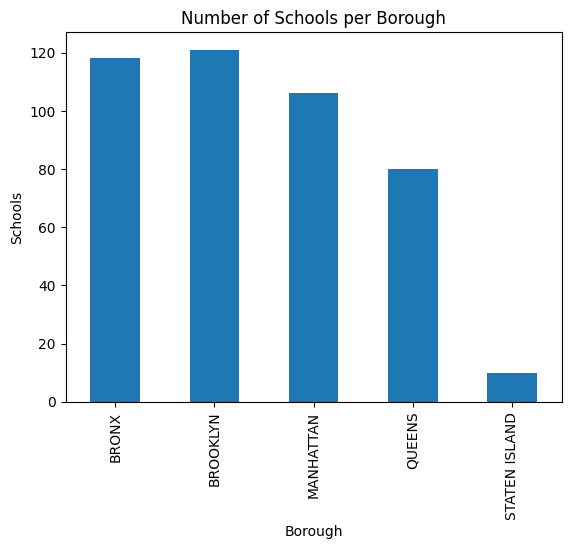

In [29]:
#Schools per borough
df1["borough"].value_counts().sort_index().plot(kind="bar")
plt.title("Number of Schools per Borough")
plt.xlabel("Borough")
plt.ylabel("Schools")
plt.show()

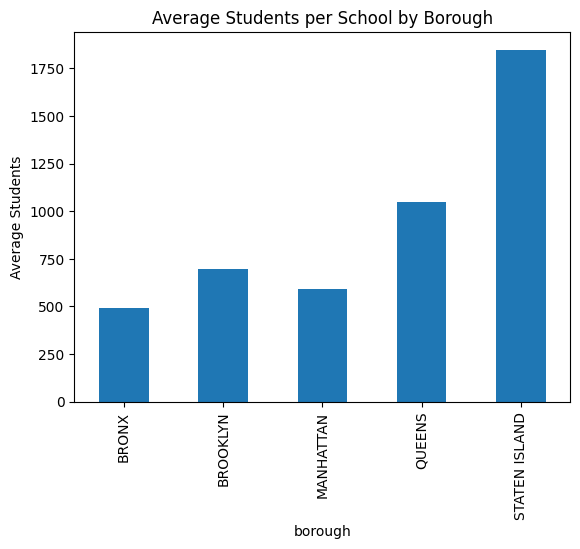

In [30]:
#Average students by borough
#staten island has small amount of schools but lots of students
df1.groupby("borough")["total_students"].mean().plot(kind="bar")
plt.title("Average Students per School by Borough")
plt.ylabel("Average Students")
plt.show()

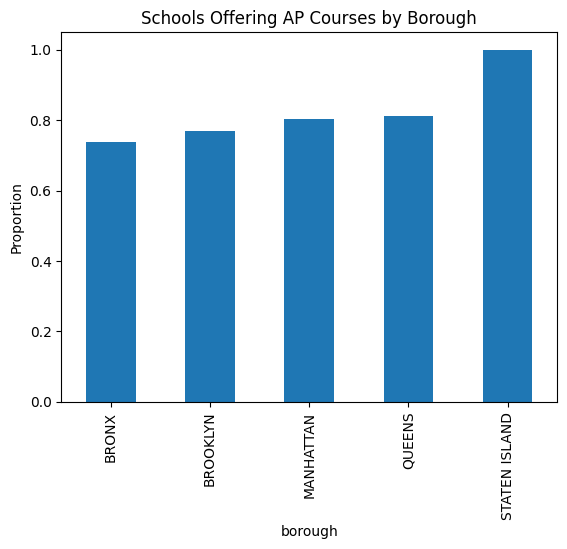

In [31]:
#Share of schools with AP courses by borough
df1.groupby("borough")["has_ap"].mean().plot(kind="bar")
plt.title("Schools Offering AP Courses by Borough")
plt.ylabel("Proportion")
plt.show()

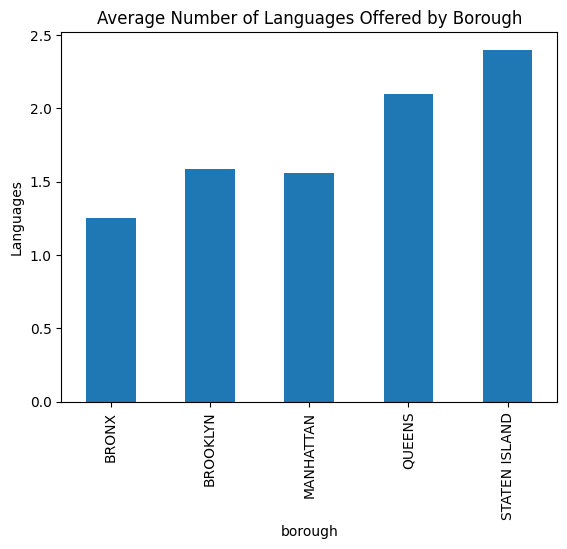

In [32]:
#Average number of languages by borough
df1.groupby("borough")["language_count"].mean().plot(kind="bar")
plt.title("Average Number of Languages Offered by Borough")
plt.ylabel("Languages")
plt.show()

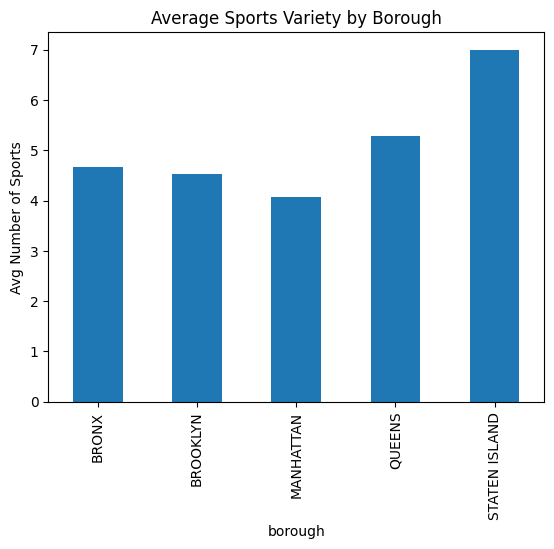

In [33]:
#Sports variety by borough
if "sports_count_detected" in df1.columns:
    df1.groupby("borough")["sports_count_detected"].mean().plot(kind="bar")
    plt.title("Average Sports Variety by Borough")
    plt.ylabel("Avg Number of Sports")
    plt.show()

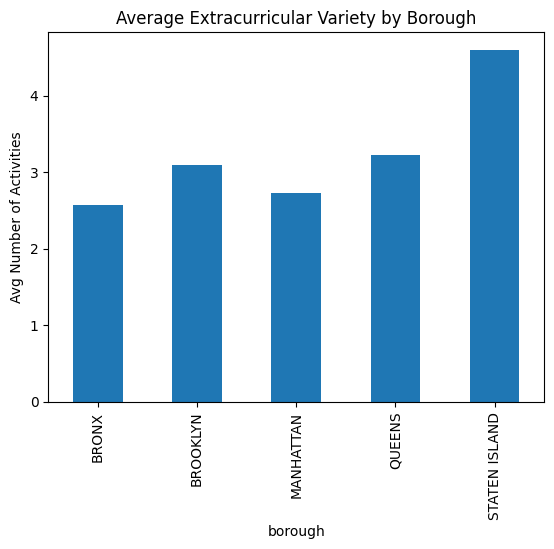

In [34]:
#average extracurricular variety
if "extra_count_detected" in df1.columns:
    df1.groupby("borough")["extra_count_detected"].mean().plot(kind="bar")
    plt.title("Average Extracurricular Variety by Borough")
    plt.ylabel("Avg Number of Activities")
    plt.show()

In [35]:
# --- Borough-level transit access ---

transit_aggs = {}
if "has_bus" in df1.columns: transit_aggs["has_bus"] = "mean"
if "bus_route_count" in df1.columns: transit_aggs["bus_route_count"] = "mean"
if "has_subway" in df1.columns: transit_aggs["has_subway"] = "mean"
if "subway_line_count" in df1.columns: transit_aggs["subway_line_count"] = "mean"
if "transit_reach_index" in df1.columns: transit_aggs["transit_reach_index"] = "mean"

if transit_aggs:
    borough_transit = df1.groupby("borough").agg(transit_aggs).round(2)
    print("Borough transit overview:")
    display(borough_transit)




Borough transit overview:


,has_bus,bus_route_count,has_subway,subway_line_count,transit_reach_index
borough,,,,,
BRONX,1.00,7.58,0.83,1.13,-0.16
BROOKLYN,1.00,6.56,0.88,1.86,-0.05
MANHATTAN,0.99,8.77,0.98,2.72,0.57
QUEENS,1.00,6.76,0.57,0.98,-0.34
STATEN ISLAND,1.00,6.10,0.00,0.00,-0.78


Top 15 languages overall:


,count
language_classes,
spanish,365
french,104
chinese,45
italian,41
latin,25
spanish native language arts,24
japanese,15
american sign language,13
arabic,10


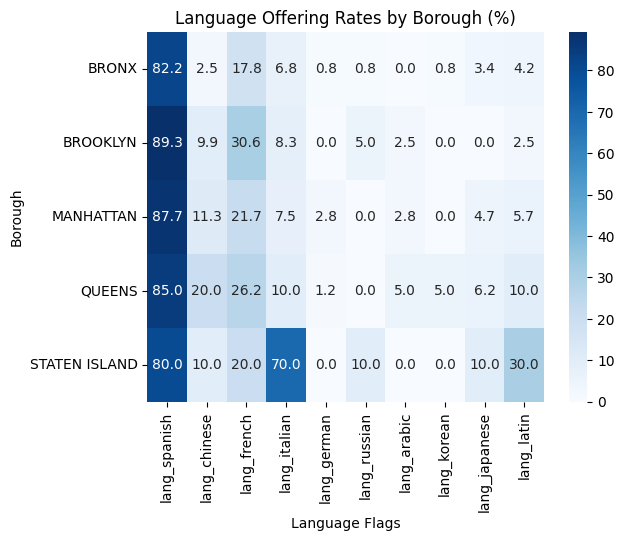

In [36]:
#Top languages overall

if "language_classes" in df1.columns:
    langs_exploded = (
        df1["language_classes"].dropna()
           .str.lower()
           .str.replace(r"\(.*?\)", "", regex=True)
           .str.split(r"[,/;|]", expand=False)
           .explode()
           .str.strip()
    )
    langs_exploded = langs_exploded[langs_exploded.str.len() > 0]
    top_langs = langs_exploded.value_counts().head(15)
    print("Top 15 languages overall:")
    display(top_langs)

#Borough × language flags heatmap

lang_flag_cols = [c for c in df1.columns if c.startswith("lang_")]
if lang_flag_cols:
    langs_by_borough = df1.groupby("borough")[lang_flag_cols].mean().mul(100).round(1)
    sns.heatmap(langs_by_borough, annot=True, fmt=".1f", cmap="Blues")
    plt.title("Language Offering Rates by Borough (%)")
    plt.xlabel("Language Flags")
    plt.ylabel("Borough")
    plt.show()


In [37]:
#comparing the top and bottom 8 of different metrics

cols_show = [c for c in [
    "dbn","borough","total_students","number_programs","ap_course_count",
    "language_count","sports_count_detected","extra_count_detected","richness_score",
    "bus_route_count","subway_line_count","transit_reach_index"
] if c in df1.columns]

if "richness_score" in df1.columns:
    print("Top 8 schools by Richness Score:")
    display(df1.sort_values("richness_score", ascending=False).head(8)[cols_show])

    print("Bottom 8 schools by Richness Score:")
    display(df1.sort_values("richness_score", ascending=True).head(8)[cols_show])

if "ap_course_count" in df1.columns:
    print("Top 8 schools by AP Course Count:")
    display(df1.sort_values("ap_course_count", ascending=False).head(8)[cols_show])

if "language_count" in df1.columns:
    print("Top 8 schools by Language Count:")
    display(df1.sort_values("language_count", ascending=False).head(8)[cols_show])


Top 8 schools by Richness Score:


,dbn,borough,total_students,number_programs,ap_course_count,language_count,sports_count_detected,extra_count_detected,richness_score,bus_route_count,subway_line_count,transit_reach_index
159,26Q430,QUEENS,4058.0,5,23,10,8,8,3.365504,4,0,-1.081916
113,26Q495,QUEENS,3241.0,7,23,7,8,6,2.926611,4,0,-1.081916
275,31R450,STATEN ISLAND,2396.0,10,16,5,8,6,2.728574,12,0,0.077615
97,30Q450,QUEENS,2522.0,7,24,6,7,4,2.475118,7,1,-0.293335
392,10X445,BRONX,3037.0,1,31,7,9,4,2.334596,7,2,0.060423
86,21K540,BROOKLYN,1937.0,8,19,5,7,4,2.251955,4,3,-0.020644
357,20K445,BROOKLYN,3362.0,8,12,6,6,5,2.145321,4,1,-0.728159
295,28Q505,QUEENS,3231.0,8,11,7,6,4,2.134518,26,2,2.814309


Bottom 8 schools by Richness Score:


,dbn,borough,total_students,number_programs,ap_course_count,language_count,sports_count_detected,extra_count_detected,richness_score,bus_route_count,subway_line_count,transit_reach_index
109,09X276,BRONX,227.0,1,0,0,0,0,-1.331526,8,0,-0.502151
114,07X520,BRONX,189.0,1,1,0,0,1,-1.170025,5,2,-0.229460
92,27Q314,QUEENS,NaN,1,1,1,0,0,-1.140734,4,0,-1.081916
157,27Q334,QUEENS,NaN,1,1,1,0,0,-1.140734,1,1,-1.162983
7,17K122,BROOKLYN,330.0,1,0,0,2,0,-1.135371,8,3,0.559121
188,19K422,BROOKLYN,169.0,1,0,0,0,2,-1.088712,10,0,-0.212268
369,22K555,BROOKLYN,618.0,1,0,1,1,0,-1.082751,4,2,-0.374402
306,07X259,BRONX,126.0,1,0,0,3,0,-1.037293,5,2,-0.229460


Top 8 schools by AP Course Count:


,dbn,borough,total_students,number_programs,ap_course_count,language_count,sports_count_detected,extra_count_detected,richness_score,bus_route_count,subway_line_count,transit_reach_index
392,10X445,BRONX,3037.0,1,31,7,9,4,2.334596,7,2,0.060423
81,02M475,MANHATTAN,3292.0,1,27,7,7,2,1.735251,5,2,-0.229460
227,13K430,BROOKLYN,5458.0,1,27,4,8,6,1.866865,11,6,2.055217
97,30Q450,QUEENS,2522.0,7,24,6,7,4,2.475118,7,1,-0.293335
4,03M485,MANHATTAN,2730.0,6,24,4,6,5,2.069048,10,3,0.849004
159,26Q430,QUEENS,4058.0,5,23,10,8,8,3.365504,4,0,-1.081916
113,26Q495,QUEENS,3241.0,7,23,7,8,6,2.926611,4,0,-1.081916
355,01M539,MANHATTAN,1725.0,1,20,5,8,5,1.615495,7,1,-0.293335


Top 8 schools by Language Count:


,dbn,borough,total_students,number_programs,ap_course_count,language_count,sports_count_detected,extra_count_detected,richness_score,bus_route_count,subway_line_count,transit_reach_index
252,24Q530,QUEENS,503.0,1,11,11,5,4,1.743190,8,2,0.205364
159,26Q430,QUEENS,4058.0,5,23,10,8,8,3.365504,4,0,-1.081916
392,10X445,BRONX,3037.0,1,31,7,9,4,2.334596,7,2,0.060423
81,02M475,MANHATTAN,3292.0,1,27,7,7,2,1.735251,5,2,-0.229460
295,28Q505,QUEENS,3231.0,8,11,7,6,4,2.134518,26,2,2.814309
113,26Q495,QUEENS,3241.0,7,23,7,8,6,2.926611,4,0,-1.081916
13,28Q440,QUEENS,3800.0,5,18,7,6,1,1.666941,4,1,-0.728159
50,20K490,BROOKLYN,4317.0,5,17,6,8,2,1.793711,3,0,-1.226857


In [38]:
#core numeric features
num_candidates = [
    "total_students","number_programs","ap_course_count","language_count",
    "sports_count_detected","extra_count_detected","richness_score",
    "bus_route_count","subway_line_count","transit_reach_index"
]
num_cols = [c for c in num_candidates if c in df1.columns]
display(df1[num_cols].describe().T.assign(missing=df1[num_cols].isna().sum()))


,count,mean,std,min,25%,50%,75%,max,missing
total_students,426.0,7.038427e+02,775.870436,50.000000,349.000000,460.500000,622.000000,5458.000000,9
number_programs,435.0,1.708046e+00,1.564233,1.000000,1.000000,1.000000,2.000000,10.000000,0
ap_course_count,435.0,4.696552e+00,4.993993,0.000000,1.000000,4.000000,7.000000,31.000000,0
language_count,435.0,1.602299e+00,1.328696,0.000000,1.000000,1.000000,2.000000,11.000000,0
sports_count_detected,435.0,4.650575e+00,2.041554,0.000000,3.000000,5.000000,6.000000,10.000000,0
extra_count_detected,435.0,2.924138e+00,1.649254,0.000000,2.000000,3.000000,4.000000,8.000000,0
richness_score,435.0,-2.041789e-18,0.684707,-1.331526,-0.419161,-0.125751,0.212930,3.365504,0
bus_route_count,435.0,7.402299e+00,3.453642,0.000000,5.000000,7.000000,9.000000,29.000000,0
subway_line_count,435.0,1.664368e+00,1.415026,0.000000,1.000000,1.000000,2.000000,7.000000,0
transit_reach_index,435.0,-2.424625e-17,0.812035,-1.516740,-0.583217,-0.084519,0.454713,3.249133,0


In [39]:
grade_summary = df1.groupby("borough")["grade_span_max"].describe()
print("Grade span max summary by borough:")
print(grade_summary)

Grade span max summary by borough:
               count       mean       std   min   25%   50%   75%   max
borough                                                                
BRONX          118.0  11.906780  0.369506   9.0  12.0  12.0  12.0  12.0
BROOKLYN       121.0  11.933884  0.381566   9.0  12.0  12.0  12.0  12.0
MANHATTAN      106.0  11.877358  0.472135   9.0  12.0  12.0  12.0  12.0
QUEENS          80.0  11.825000  0.497462  10.0  12.0  12.0  12.0  12.0
STATEN ISLAND   10.0  12.000000  0.000000  12.0  12.0  12.0  12.0  12.0


#Conclusions


The exploration is showing differences in the available programs from school to school. This correlates with the results from the incident dataset, showing that schools with less opportunities tend to have more of those.

Ideas for further analysis

-combine with criminality dataset and look for correlations regarding opportunities and incidents

-map of districts to show hotspots

-look for more information on number of teachers, average students per class etc

